# Eindimensional Interpolation von Kräftverläufen aus lokalisierent Basisfunktionen 


## Created: RW, 20.2.20
## Revision: 22.2.20
## Status: works

## Laden von notwendigen python Modulen

In [1]:
import numpy as np
import scipy as sp
#from scipy.optimize import root
#import scipy.constants as co

import matplotlib
matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'font.size': 11,
    'text.usetex': True,
    'pgf.rcfonts': False,
})

#%matplotlib inline - Figures are shown as static png images (optionally svg if configured)
%matplotlib notebook 
#or %matplotlib nbagg - Interactive Figures inside the notebook
# %matplotlib widgets - - Interactive Figures inside the notebook (requires jupyter-matplotlib to be installed)
#%matplotlib tk or 
#%matplotlib qt 
# etc. - GUI windows show the figure externally to the notebook with the given interactive backend

import matplotlib.pyplot as plt
import matplotlib.cm as cm


## Interpolationsformel  $f(t)=\sum_{i=1}^N f_i \delta_\tau(t-t_i) \Delta\tau$

### Naive Stufenfunktionen

In [2]:
f=lambda i:1.0 if i else 0.0
def delta(t,tau):    
    return np.array([f(i) for i in np.abs(t)<tau])

### Test
Für einen $f(t)=\cos{\Omega t}$ Kraftverlauf untersuchen wir eine stufenförmige Interpolationsmethode. Je feiner die Diskretisierung gewählt wird, um so kleiner wird der Fehler bei punktweisem Vergleich. 

<IPython.core.display.Javascript object>


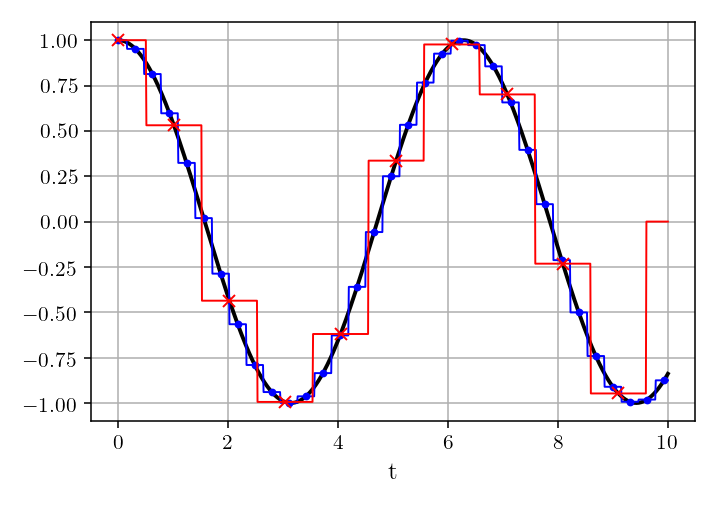

In [67]:
# choose latex document textwidth for landscape pictures
fig,ax=plt.subplots(1,1,figsize=(5.1483,5.1483/np.sqrt(2.0)))

'''time '''
t=np.linspace(0,10,1000)

omega0=1.0
force=np.cos(omega0*t)
ax.plot(t,force,'k-',lw=2,label="Force")

####################################################################
Ndisk=31
ti=t[0::Ndisk]
forcei=force[0::Ndisk]

tau=(ti[2]-ti[1])/2.0

fi=np.zeros_like(t)
for i in range(len(ti)):
    fi=fi+forcei[i]*delta(t-ti[i],tau)
    
ax.plot(t,fi,'b-',ti,forcei,'b.',lw=1,label="unitstep")


####################################################################
Ndisk=101
ti=t[0::Ndisk]
forcei=force[0::Ndisk]

tau=(ti[2]-ti[1])/2.0

fi=np.zeros_like(t)
for i in range(len(ti)):
    fi=fi+forcei[i]*delta(t-ti[i],tau)
    
ax.plot(t,fi,'r-',ti,forcei,'rx',lw=1,label="unitstep")




ax.set_xlabel(r't',fontsize='large')
#ax.set_ylabel(r'$|T|^2$',fontsize='large',rotation='horizontal',labelpad=20)
# By using ``transform=vax.get_xaxis_transform()`` the y coordinates are scaled
# such that 0 maps to the bottom of the axes and 1 to the top.
# ax.vlines([Omres-Gammares/2.0, Omres+Gammares/2.0], 0, 1, transform=ax.get_xaxis_transform(), colors='g',linestyles='dotted')
#ax.hlines( [Ires/2],0, 1,transform=ax.get_yaxis_transform(), 
#          colors='g',linestyles='dotted',
#          label=r'$|T_r(\tilde \kappa=0.2)|^2/2$')
# for the exact FWHM 
# for the Gamma_r approximation of the linewidth
#ax.axvspan(Omres-Gammares/2.0, Omres+Gammares/2.0, facecolor='#2ca02c', alpha=0.1)
#ax.axvspan(OmresmiHWHM, OmresplHWHM, facecolor='#2ca02c', alpha=0.1)
#ax.annotate(r'$\tilde{\Gamma}(\Omega_r)$', xy=(0.78, 0.7), xycoords='data',fontsize='large')
#ax.set_ylim(ymin=-0.2,ymax=7)
ax.grid()
#ax.legend(loc='upper right')
fig.tight_layout()

#plt.savefig('pictures/resonance_spectrum.pdf', dpi=300, facecolor='w', edgecolor='w',
#            orientation='landscape', papertype='a5', format=None,
#            transparent=False, bbox_inches=None, pad_inches=0.0, metadata=None)
#plt.savefig('pictures/resonance_spectrum.pgf', dpi=300, facecolor='w', edgecolor='w',
#          orientation='landscape', papertype='a5', format=None,
#            transparent=False, bbox_inches=None, pad_inches=0.0, metadata=None)



## Basis splines
Ein viel besseres modernes Verfahren sin die sogenannatne B-splines

In [121]:
'''order of polynomial approximation'''
order = 3
'''knots n+k+1'''
knots = [-2,-1,0, 1, 2, 3, 4, 5, 6,7,8,9 ,10,11,12,13]


#coef0 =  [ 0,0, 0, 0, 1, 0, 0, 0, 0,0,0,0 ]
coefmat=np.eye(14)
#spl = sp.interpolate.BSpline(t=knots, c=coef0, k=order,
#                             extrapolate='periodic')
#ynew = sp.interpolate.splev(t, spl, der=0)


lispl=[sp.interpolate.BSpline(t=knots,\
    c=cv, k=order, extrapolate='periodic') 
       for cv in coefmat]

yy=np.array([sp.interpolate.splev(t, spl, der=0) for spl in lispl])


plt.figure()
plt.plot(t,np.transpose(yy[4:8,:]))
#plt.legend(['Linear', 'Cubic Spline', 'True'])
#plt.axis([-0.05, 6.33, -1.05, 1.05])
#plt.title('Basis-splines')
plt.show()

<IPython.core.display.Javascript object>

# x = np.arange(0, 2*np.pi+np.pi/4, 2*np.pi/8)
y = np.sin(x)
tck = interpolate.splrep(x, y, s=0)
xnew = np.arange(0, 2*np.pi, np.pi/50)
ynew = interpolate.splev(xnew, tck, der=0)

In [ ]:
plt.figure()
plt.plot(x, y, 'x', xnew, ynew, xnew, np.sin(xnew), x, y, 'b')
plt.legend(['Linear', 'Cubic Spline', 'True'])
plt.axis([-0.05, 6.33, -1.05, 1.05])
plt.title('Cubic-spline interpolation')
plt.show()

In [ ]:
yder = interpolate.splev(xnew, tck, der=1)
plt.figure()
plt.plot(xnew, yder, xnew, np.cos(xnew),'--')
plt.legend(['Cubic Spline', 'True'])
plt.axis([-0.05, 6.33, -1.05, 1.05])
plt.title('Derivative estimation from spline')
plt.show()

In [ ]:
def integ(x, tck, constant=-1):
    x = np.atleast_1d(x)
    out = np.zeros(x.shape, dtype=x.dtype)
    for n in range(len(out)):
        out[n] = interpolate.splint(0, x[n], tck)
    out += constant
    return out


yint = integ(xnew, tck)
plt.figure()
plt.plot(xnew, yint, xnew, -np.cos(xnew), '--')
plt.legend(['Cubic Spline', 'True'])
plt.axis([-0.05, 6.33, -1.05, 1.05])
plt.title('Integral estimation from spline')
plt.show()

In [ ]:
interpolate.sproot(tck)

In [ ]:
x = np.linspace(-np.pi/4, 2.*np.pi + np.pi/4, 21)
y = np.sin(x)
tck = interpolate.splrep(x, y, s=0)
interpolate.sproot(tck)

In [ ]:
tck

In [ ]:
tck.index